### Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("ggplot")
%matplotlib inline

## Exploratory Data Analysis

In [2]:
df= pd.read_csv("data.csv")

In [3]:
df.head()

,Count,CQ,HW,AT,UT,FE,Total,Grade
0,1,93,92.37,100,71.00,54.0,74.4555,C
1,2,92,88.77,90,82.33,100.0,88.1805,B
2,3,96,69.21,100,73.33,78.0,77.2465,C
3,4,92,92.72,100,73.33,85.0,81.7730,B
4,5,100,84.74,90,70.00,45.0,71.2110,C


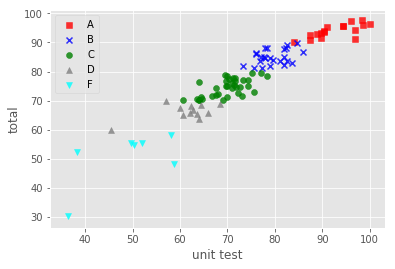

In [4]:
y=df.Grade
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'green', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=df[y == cl]["UT"], y=df[y == cl]["Total"],
                alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
plt.xlabel('unit test')
plt.ylabel('total')
plt.legend(loc='upper left')
plt.show()

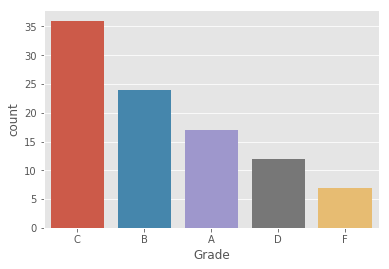

In [5]:
plt.figure()
sns.countplot(x="Grade", data=df,order = df['Grade'].value_counts().index)

In [6]:
df.Grade.replace(["A","B","C","D","F"],[0,1,2,3,4],inplace=True)

In [7]:
df.drop(["Count","Total"],axis=1).head()

,CQ,HW,AT,UT,FE,Grade
0,93,92.37,100,71.00,54.0,2
1,92,88.77,90,82.33,100.0,1
2,96,69.21,100,73.33,78.0,2
3,92,92.72,100,73.33,85.0,1
4,100,84.74,90,70.00,45.0,2


### Build a KNN (k-Nearest Neighbors) Classifier

In [8]:
X = df.drop(["Count","Grade","Total"], axis=1)
y = df.Grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [9]:
X.head()

,CQ,HW,AT,UT,FE
0,93,92.37,100,71.00,54.0
1,92,88.77,90,82.33,100.0
2,96,69.21,100,73.33,78.0
3,92,92.72,100,73.33,85.0
4,100,84.74,90,70.00,45.0


In [10]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, algorithm='auto', weights='distance') # default value n_neighbors=5

In [11]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [12]:
y_pred = knn.predict(X_test_std)


In [13]:
# print the accuracy
knn.score(X_test_std, y_test)

0.9

In [14]:
print(y_test.value_counts())
pd.value_counts(y_pred)

2    7
1    5
0    4
3    3
4    1
Name: Grade, dtype: int64


2    8
0    5
1    4
3    2
4    1
dtype: int64